## 1. Data Collection

In [1]:
#Importing of basic required python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading of Dataset
data = pd.read_csv('News.csv',index_col=0)
data.head()

,title,text,subject,date,class
0.0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0.0
1.0,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0.0
2.0,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0.0
3.0,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0.0
4.0,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0.0


In [3]:
data.shape

(44961, 5)

## 2. Data Preprocessing

In [4]:
#Title, Subject and Date columns will not be needed for the classification of news and thus can be dropped
data = data.drop(["title", "subject","date"], axis = 1)

In [5]:
#Checking for NULL Values in dataset
data.isnull().sum()

text     42
class    63
dtype: int64

In [6]:
#NULL values are present and hence have to be removed from the dataset
data = data.dropna()

In [7]:
#Checking for NULL Values in dataset after removal
data.isnull().sum()

text     0
class    0
dtype: int64

In [8]:
#Shuffling of dataset to prevent bias and reduce overfitting
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

In [9]:
#Importing of NLTK packages for data pre-processing
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#Function for the pre-processing of data (Removal of stopwords, punctuation, unneccessary spaces)
def preprocess_text(text_data):
	preprocessed_text = []
	
	for sentence in tqdm(text_data):
		sentence = re.sub(r'[^\w\s]', '', sentence)
		preprocessed_text.append(' '.join(token.lower()
								for token in str(sentence).split()
								if token not in stopwords.words('english')))

	return preprocessed_text

In [11]:
#Pre-processing of dataset using the above function
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

100%|████████████████████████████████████████████████████████████████████████████| 44898/44898 [59:52<00:00, 12.50it/s]


## 3. Feature Extraction/Data Exploration

### Bar Graph of the total number of real(Class = 1) and fake(Class = 0) news articles in dataset

### Word Cloud of the Real News Dataset

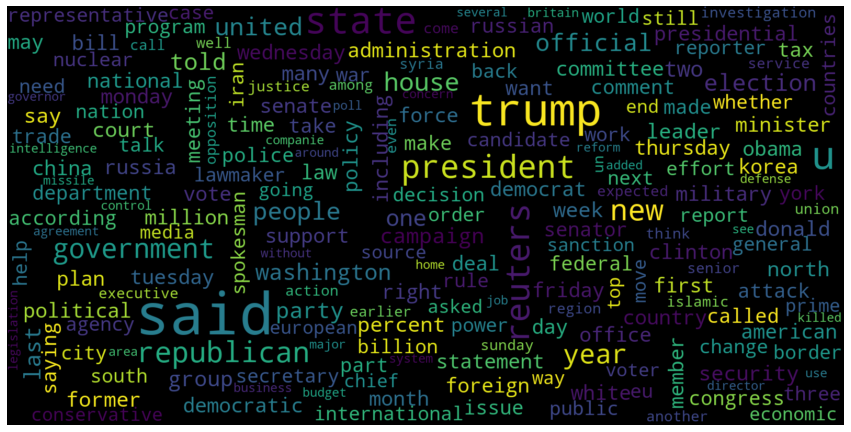

In [14]:
# Real News
consolidated = ' '.join(
	word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


### World Cloud of the Fake News Dataset

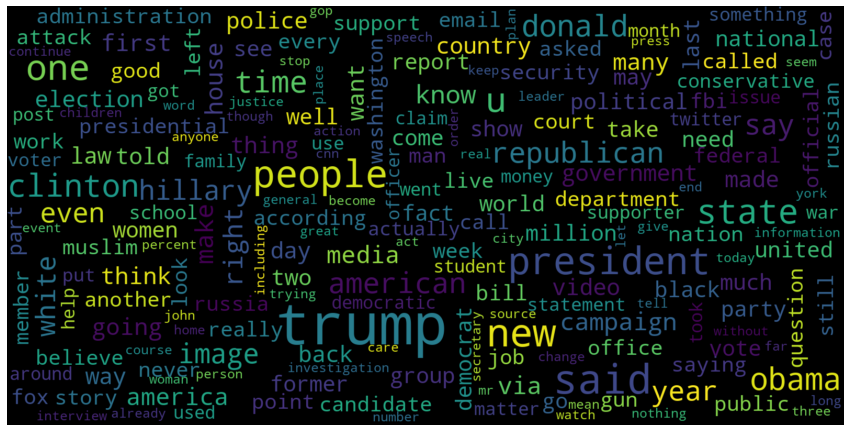

In [15]:
# Fake News
consolidated = ' '.join(
	word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
					height=800,
					random_state=21,
					max_font_size=110,
					collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()


### Bar Graph of the top 20 most used words in dataset

<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

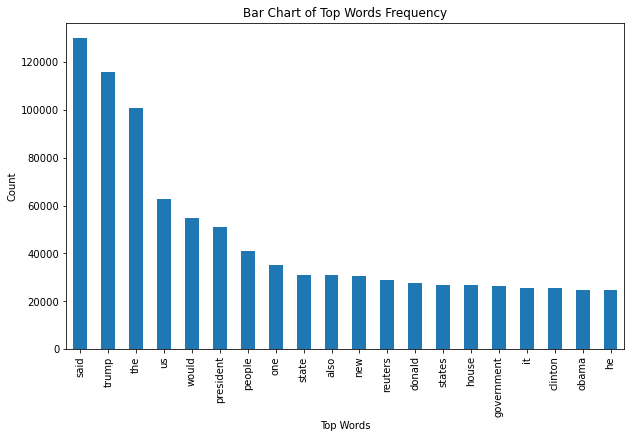

In [16]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
	vec = CountVectorizer().fit(corpus)
	bag_of_words = vec.transform(corpus)
	sum_words = bag_of_words.sum(axis=0)
	words_freq = [(word, sum_words[0, idx])
				for word, idx in vec.vocabulary_.items()]
	words_freq = sorted(words_freq, key=lambda x: x[1],
						reverse=True)
	return words_freq[:n]


common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
	kind='bar',
	figsize=(10, 6),
	xlabel="Top Words",
	ylabel="Count",
	title="Bar Chart of Top Words Frequency"
)


### Splitting of dataset into test and training sets

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data['text'],
													data['class'],
													test_size=0.25)

### Vectorization of data using TfidfVectorizer()

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

## 4. Model Training

In [19]:
#Naive Bayes Classifier Model
from sklearn import naive_bayes

NaiveModel = naive_bayes.MultinomialNB()
NaiveModel.fit(x_train, y_train)

MultinomialNB()

In [20]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression

LogRegModel = LogisticRegression()
LogRegModel.fit(x_train, y_train)

LogisticRegression()

In [21]:
#Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

DecisionTreeModel = DecisionTreeClassifier()
DecisionTreeModel.fit(x_train, y_train)

DecisionTreeClassifier()

In [22]:
#KNN-Algorithm Model
from sklearn.neighbors import KNeighborsClassifier

KNNmodel = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
KNNmodel.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

## 5. Model Evaluation

In [23]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

### Results of Naive-Bayes Algorithm

In [24]:
# Print accuracy score
print("Accuracy Score of Naive-Bayes")
print(accuracy_score(y_train, NaiveModel.predict(x_train)))
print(accuracy_score(y_test, NaiveModel.predict(x_test)))
#Print F1 Score
print("F1-Score of Naive-Bayes")
print(f1_score(y_train, NaiveModel.predict(x_train)))
print(f1_score(y_test, NaiveModel.predict(x_test)))

Accuracy Score of Naive-Bayes
0.9572951622962017
0.9507349665924276
F1-Score of Naive-Bayes
0.9557184208905586
0.9488010369410239


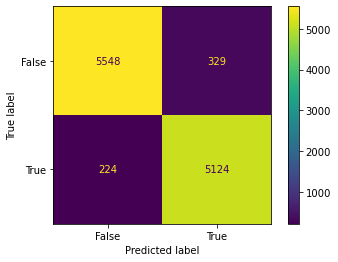

In [25]:
# Confusion matrix of Naive Bayes classification model
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, NaiveModel.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

In [34]:
real_news_headline = "Xi Jinping's guy': China's new premier Li Qiang, loyalist who oversaw Shanghai COVID-19 lockdown "
data = vectorization.transform([real_news_headline]).toarray()
print(NaiveModel.predict(data))

[1.]


In [33]:
fake_news_headline = "A Lion was seen flying in south africa today"
data = vectorization.transform([fake_news_headline]).toarray()
print(NaiveModel.predict(data))

[0.]


### Results of Logistic Regression Algorithm 

In [35]:
# Print accuracy score
print("Accuracy score of Logistic Regression")
print(accuracy_score(y_train, LogRegModel.predict(x_train)))
print(accuracy_score(y_test, LogRegModel.predict(x_test)))
# Print F1 Score
print("F1-Score of Logistic Regression")
print(f1_score(y_train, LogRegModel.predict(x_train)))
print(f1_score(y_test, LogRegModel.predict(x_test)))

Accuracy score of Logistic Regression
0.993822944198616
0.9896659242761693
F1-Score of Logistic Regression
0.9935343487721481
0.9891690009337069


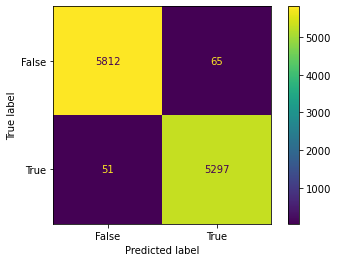

In [36]:
# Confusion matrix of Results of Logistic Regression classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, LogRegModel.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

### Results of Decision-Tree Algorithm 

In [42]:
# Print accuracy score
print("Accuracy score of Decision Tree Model")
print(accuracy_score(y_train, DecisionTreeModel.predict(x_train)))
print(accuracy_score(y_test, DecisionTreeModel.predict(x_test)))
#Print F1 Score
print("F1-Score of Decision Tree Model")
print(f1_score(y_train, DecisionTreeModel.predict(x_train)))
print(f1_score(y_test, DecisionTreeModel.predict(x_test)))

Accuracy score of Decision Tree Model
1.0
0.9959910913140312
F1-Score of Decision Tree Model
1.0
0.9957900645523434


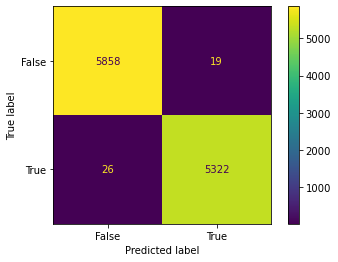

In [43]:
# Confusion matrix of Results of Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, DecisionTreeModel.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()

### Results of KNN-Algorithm

In [44]:
# Print accuracy score
print("Accuracy score of KNN Model")
print(accuracy_score(y_train, KNNmodel.predict(x_train)))
print(accuracy_score(y_test, KNNmodel.predict(x_test)))
print("F1 score of KNN Model")
print(f1_score(y_train, KNNmodel.predict(x_train)))
print(f1_score(y_test, KNNmodel.predict(x_test)))

Accuracy score of KNN Model
0.6523624268701927
0.6202227171492205
F1 score of KNN Model
0.42997662641215434
0.34243405830633966


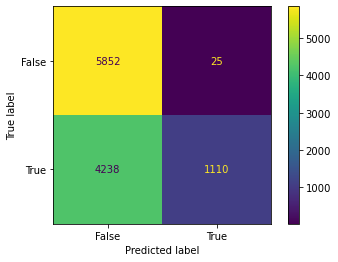

In [45]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, KNNmodel.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
											display_labels=[False, True])

cm_display.plot()
plt.show()